# Распределение степеней узлов

__Авторы задач: Макрушин С.В (SVMakrushin@fa.ru), Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. 'Лекция 2: Модели'
* Документация:
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.in_degree.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.out_degree.html
    * https://numpy.org/doc/2.2/reference/random/generated/numpy.random.zipf.html
* Дополнительные источники:
    * https://www.scaler.com/topics/matplotlib/logarithmic-scale-matplotlib/
    * https://ucilnica.fri.uni-lj.si/pluginfile.php/1147/course/section/1508/book_chapter_4.pdf
* Датасеты с сетями:
    * http://networkrepository.com

## Вопросы для совместного обсуждения

1\. Обсудите различные подходы к вычислению степеней узлов графа.

In [2]:
import networkx as nx

In [3]:
B = nx.empty_graph()
B.add_edges_from([(0, 1), (1, 2), (2, 3)])

In [4]:
B.degree

DegreeView({0: 1, 1: 2, 2: 2, 3: 1})

In [5]:
A = nx.adjacency_matrix(B).toarray()
A

array([[0, 1, 0, 0],
       [1, 0, 1, 0],
       [0, 1, 0, 1],
       [0, 0, 1, 0]])

In [6]:
A.sum(axis=0), A.sum(axis=1)

(array([1, 2, 2, 1]), array([1, 2, 2, 1]))

In [7]:
B = nx.empty_graph(create_using=nx.DiGraph)
B.add_edges_from([(0, 1), (1, 2), (2, 3)])
type(B)

networkx.classes.digraph.DiGraph

In [8]:
B.degree

DiDegreeView({0: 1, 1: 2, 2: 2, 3: 1})

In [9]:
B.in_degree

InDegreeView({0: 0, 1: 1, 2: 1, 3: 1})

In [10]:
B.out_degree

OutDegreeView({0: 1, 1: 1, 2: 1, 3: 0})

In [11]:
A = nx.adjacency_matrix(B).toarray()
A

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0]])

In [12]:
A.sum(axis=0), A.sum(axis=1)

(array([0, 1, 1, 1]), array([1, 1, 1, 0]))

In [13]:
B = nx.empty_graph()
B.add_edges_from([(0, 1), (1, 2), (2, 3)])
A = nx.adjacency_matrix(B).toarray()
degrees = A.sum(axis=0)

In [14]:
degrees

array([1, 2, 2, 1])

In [15]:
degrees / len(degrees)

array([0.25, 0.5 , 0.5 , 0.25])

2\. Обсудите использование различных шкал (линейной, логарифмической) для визуализациии графиков.

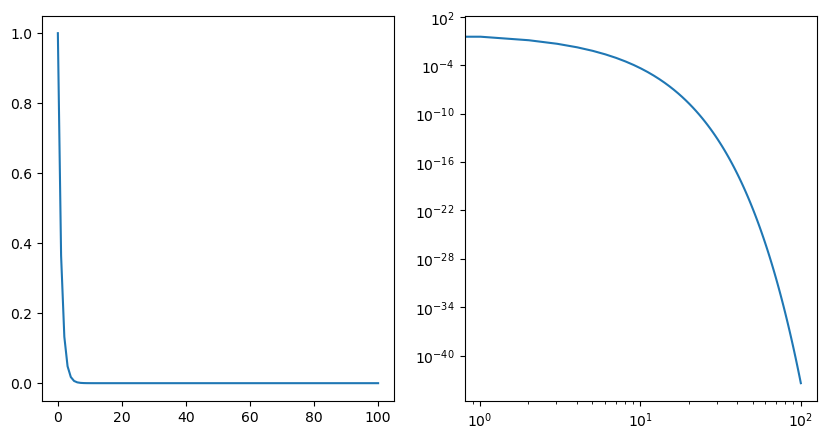

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 100, 100)
y = np.exp(-x)

fix, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(x, y)
ax[1].plot(x, y)
ax[1].set_xscale('log')
ax[1].set_yscale('log')

## Задачи для самостоятельного решения

In [17]:
import pandas as pd
import networkx as nx
import numpy as np
from scipy import stats
from collections import Counter
from matplotlib.ticker import MultipleLocator

<p class='task' id='1'></p>

1\. Создайте неориентированный граф на основе набора данных `fb-pages-food` с сайта https://networkrepository.com/. Добавьте узлам атрибут `name`, который содержит имя человека. Удалите из графа все петли. Получите матрицу смежности графа и посчитайте степень каждого узла на основе этой матрицы. Выведите имя человека, чей узел имеет максимальную степень, и само значение степени.

- [ ] Проверено на семинаре

In [18]:
nodes = pd.read_csv('data/fb-pages-food/fb-pages-food.nodes')
nodes.head()

,id,name,new_id
0,402449106435352,Josh Marks,386
1,368969274888,Blue Ribbon Restaurants,473
2,765596333518863,Pat Neely,1
3,136870209668885,La Griglia,542
4,840078802741859,Jose Garces,189


In [19]:
edges = pd.read_csv('data/fb-pages-food/fb-pages-food.edges', header=None)
edges.head()

,0,1
0,0,276
1,0,58
2,0,132
3,0,603
4,0,398


In [20]:
G = nx.Graph()

for _, row in nodes.iterrows():
    G.add_node(row['new_id'], name=row['name'])

G.add_edges_from(edges.to_numpy())
G.remove_edges_from(nx.selfloop_edges(G))

A = nx.adjacency_matrix(G).toarray()
A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
degrees = A.sum(axis=0)
max(degrees), G.nodes()[list(G.nodes())[np.argmax(degrees)]]['name']

(132, 'Logan Junior Chef')

<p class='task' id='2'></p>

2\. Используя граф из предыдущего задания, посчитайте степени каждого узла, используя возможности графа `nx.Graph`. Посчитайте и выведите на экран среднюю степень узлов графа, округленную до ближайшего целого.

- [ ] Проверено на семинаре

In [22]:
degrees = dict(G.degree())
round(sum(degrees.values()) / len(degrees))

7

<p class='task' id='3'></p>

3\. Создайте ориентированный граф на основе набора данных `fb-pages-food` с сайта https://networkrepository.com/. Удалите из графа все петли. Получите матрицу смежности графа и посчитайте входящую и исходящую степень каждого узла на основе этой матрицы. Найдите и выведите на экран максимальное значение исходящих степеней и среднее значение входящих степеней.

- [ ] Проверено на семинаре

In [23]:
nodes = pd.read_csv('data/fb-pages-food/fb-pages-food.nodes')
edges = pd.read_csv('data/fb-pages-food/fb-pages-food.edges', header=None)

G = nx.DiGraph()
for _, row in nodes.iterrows():
    G.add_node(row['new_id'], name=row['name'])

G.add_edges_from(edges.to_numpy())
G.remove_edges_from(nx.selfloop_edges(G))

A = nx.adjacency_matrix(G).toarray()
A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
degrees_out = A.sum(axis=1)
degrees_in = A.sum(axis=0)
np.max(degrees_out), np.mean(degrees_in)

(67, 3.3725806451612903)

<p class='task' id='4'></p>

4\. Постройте графики выборочной функции распределения входящих и исходящих степеней узлов для загруженного ориентированного графа. Для нахождения степеней узлов воспользуйтесь возможностями графа `nx.DiGraph`. Добавьте графикам названия, а осям - подписи. Расположите графики рядом по горизонтали.

- [ ] Проверено на семинаре

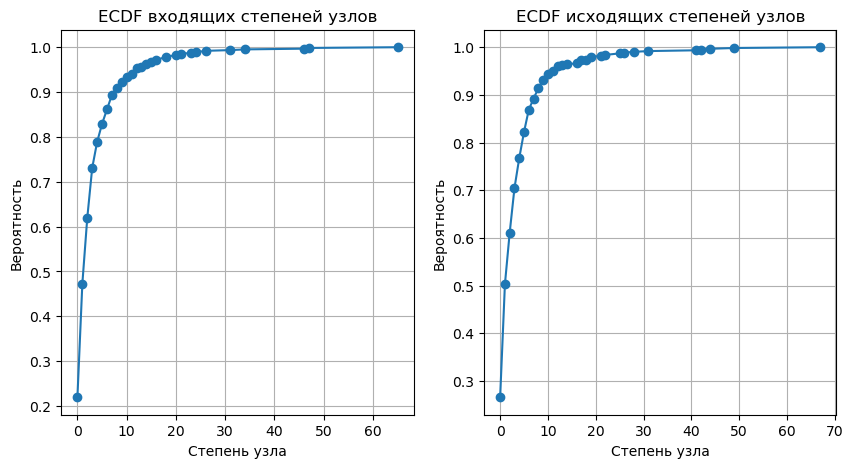

In [25]:
degrees_in = list(dict(G.in_degree()).values())
degrees_out = list(dict(G.out_degree()).values())

ecdf_in = stats.ecdf(degrees_in).cdf
ecdf_out = stats.ecdf(degrees_out).cdf

fix, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(ecdf_in.quantiles, ecdf_in.probabilities, marker='o')
ax[0].grid(which='both')
ax[0].set_title('ECDF входящих степеней узлов')
ax[0].set_xlabel('Степень узла')
ax[0].set_ylabel('Вероятность')

ax[1].plot(ecdf_out.quantiles, ecdf_out.probabilities, marker='o')
ax[1].grid(which='both')
ax[1].set_title('ECDF исходящих степеней узлов')
ax[1].set_xlabel('Степень узла')
ax[1].set_ylabel('Вероятность')

plt.show()

<p class="task" id="5"></p>

5\. Визуализируйте закон распределения степеней узлов для неориентированного варианта графа в обычной и логарифимических (по 1й и по 2м осям) системах координат для неориентированного графа. Расположите графики в виде сетки 2х2. Добавьте графикам названия, а осям - подписи. Использование готовых функций для создания и визуализации гистограмм не допускается.

- [ ] Проверено на семинаре

In [26]:
G_undirected = G.to_undirected()
degrees = list(dict(G.degree()).values())

counts = Counter(degrees)
sorted_degrees = sorted(counts.keys())
pdf = [counts[d] / len(degrees) for d in sorted_degrees]
sum(pdf)

1.0

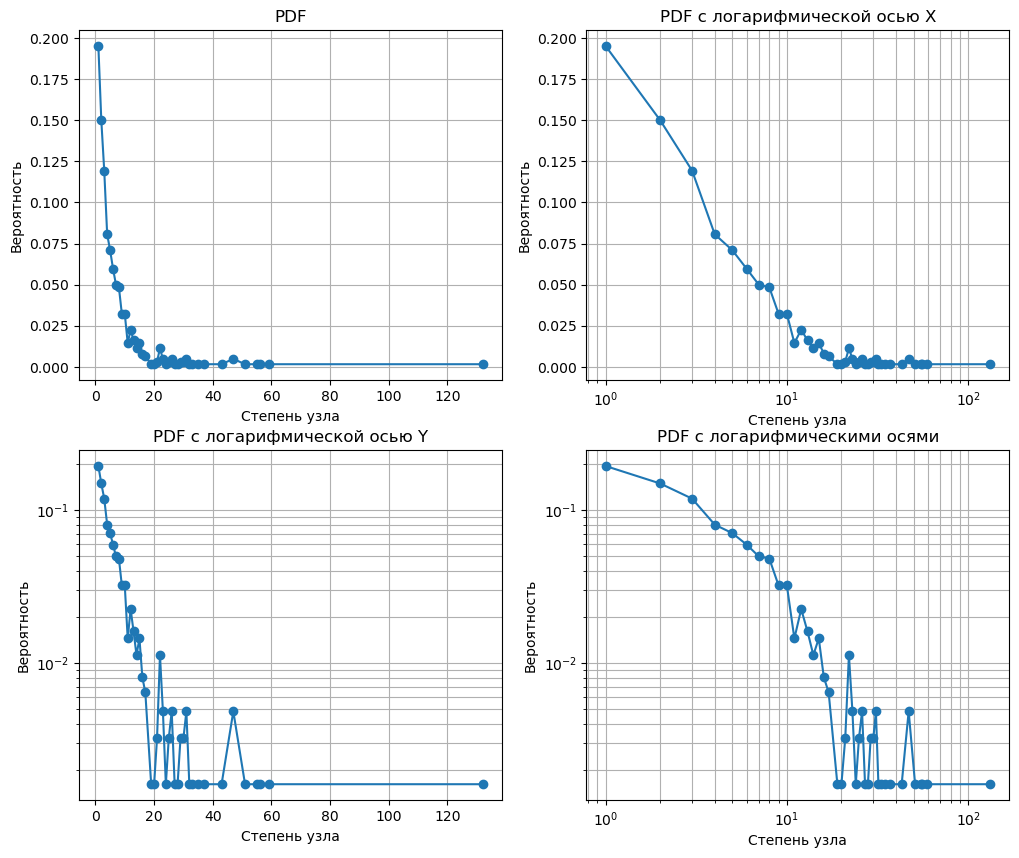

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].plot(sorted_degrees, pdf, marker='o')
axes[0, 0].grid(which='both')
axes[0, 0].set_title('PDF')
axes[0, 0].set_xlabel('Степень узла')
axes[0, 0].set_ylabel('Вероятность')

axes[0, 1].plot(sorted_degrees, pdf, marker='o')
axes[0, 1].grid(which='both')
axes[0, 1].set_xscale('log')
axes[0, 1].set_title('PDF с логарифмической осью X')
axes[0, 1].set_xlabel('Степень узла')
axes[0, 1].set_ylabel('Вероятность')

axes[1, 0].plot(sorted_degrees, pdf, marker='o')
axes[1, 0].grid(which='both')
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('PDF с логарифмической осью Y')
axes[1, 0].set_xlabel('Степень узла')
axes[1, 0].set_ylabel('Вероятность')

axes[1, 1].plot(sorted_degrees, pdf, marker='o')
axes[1, 1].grid(which='both')
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('PDF с логарифмическими осями')
axes[1, 1].set_xlabel('Степень узла')
axes[1, 1].set_ylabel('Вероятность')

plt.show()

<p class='task' id='6'></p>

6\. Сгенерируйте выборку из Дзета-распределения (распределение Ципфа) с числом наблюдений 10 тыс. и параметром распределения $\alpha=2$. Визуализируйте эмпирический закон распределения с использованием линейного и логарифмического биннинга. Визуализируйте оба варианта в линейных и логарифмических (log-log) координатах (должно получиться 4 изображения).


- [ ] Проверено на семинаре

In [28]:
def linear_binning(x, n):
  x_min, x_max = x.min(), x.max()
  pts = np.linspace(x_min, x_max, n)
  
  x_bin = []
  y_bin = []

  for a, b in zip(pts, pts[1:]):
    c = np.sum((x >= a) & (x < b))
    x_bin.append((a + b) / 2)
    y_bin.append(c / len(x))

  return x_bin, y_bin  


def log_binning(x, n):
  x_min, x_max = x.min(), x.max()
  pts = np.logspace(np.log10(x_min), np.log10(x_max), n) # np.linspace(x_min, x_max) # линейно - не подходит

  x_bin = []
  y_bin = []

  for a, b in zip(pts, pts[1:]):
    c = np.sum((x >= a) & (x < b))
    x_bin.append((a + b) / 2)
    y_bin.append(c / len(x))

  return x_bin, y_bin

x = np.random.zipf(a=2, size=10_000)
x_bin_lin, y_bin_lin = linear_binning(x, 30)
x_bin_log, y_bin_log = log_binning(x, 30)

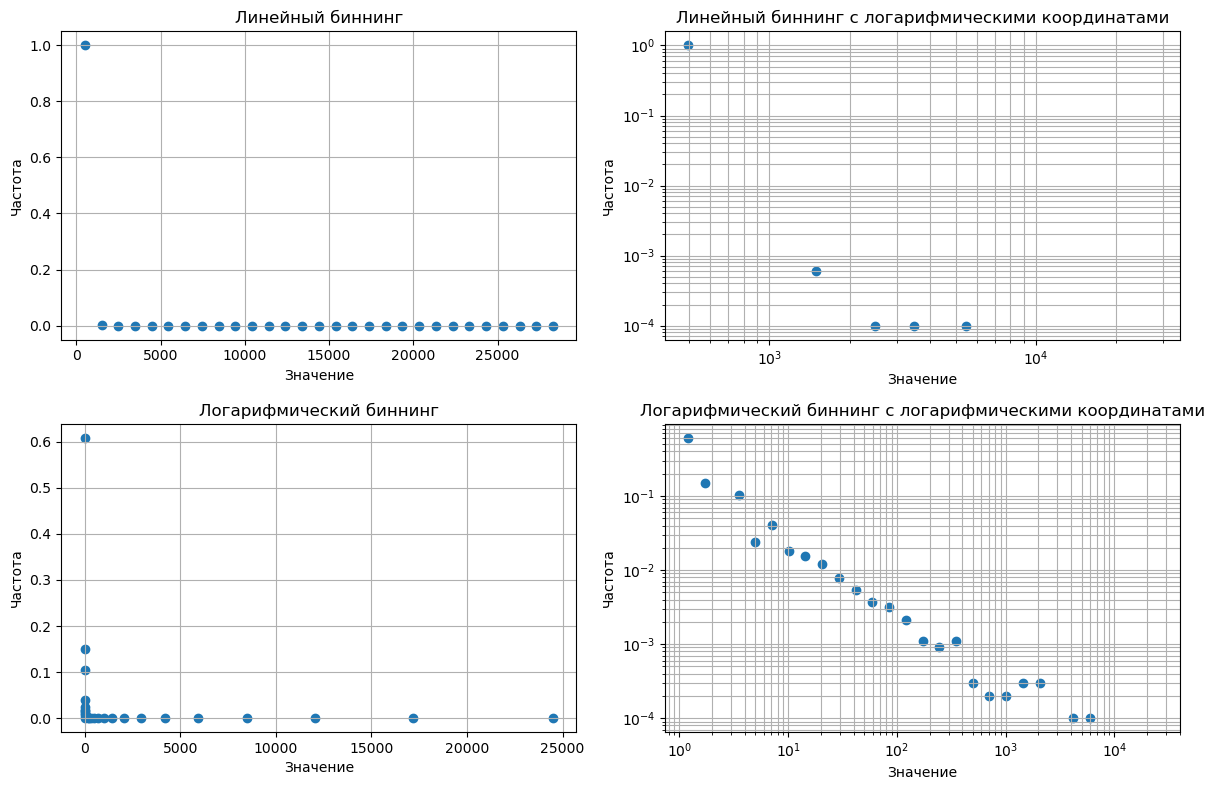

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].scatter(x_bin_lin, y_bin_lin)
axes[0, 0].set_title('Линейный биннинг')
axes[0, 0].set_xlabel('Значение')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].grid(True)

axes[0, 1].scatter(x_bin_lin, y_bin_lin)
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Линейный биннинг с логарифмическими координатами')
axes[0, 1].set_xlabel('Значение')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].grid(True, which='both')

axes[1, 0].scatter(x_bin_log, y_bin_log)
axes[1, 0].set_title('Логарифмический биннинг')
axes[1, 0].set_xlabel('Значение')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].grid(True)

axes[1, 1].scatter(x_bin_log, y_bin_log)
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('Логарифмический биннинг с логарифмическими координатами')
axes[1, 1].set_xlabel('Значение')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].grid(True, which='both')

plt.tight_layout()
plt.show()